In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime
import pickle


# 데이터 읽기 및 전처리

cond1_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition1.csv")
cond1_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition1.csv")
cond1_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition1.csv")
cond1_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition1.csv")

cond2_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition2.csv")
cond2_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition2.csv")
cond2_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition2.csv")
cond2_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition2.csv")

cond3_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition3.csv")
cond3_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition3.csv")
cond3_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition3.csv")
cond3_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition3.csv")

# 데이터 읽기 및 전처리
df_topic_day = pd.read_csv("../../R/data/topic_day_panel.csv")

# 파일 불러오기
with open('../../data/df_postcnt_per_tag.pkl', 'rb') as f:
    df_postcnt_per_tag = pickle.load(f)



In [2]:
cond_treat0_s = (df_postcnt_per_tag['cdate']>= '2021-10-06')
cond_treat0_e = (df_postcnt_per_tag['cdate']<= '2022-03-15')

cond_treat1_s = (df_postcnt_per_tag['cdate']>= '2022-10-05')
cond_treat1_e = (df_postcnt_per_tag['cdate']<= '2023-03-14')


In [3]:
cond3_treat_0_1.columns[:]

Index(['cdate', 'del_yn', 'python', 'javascript', 'reactjs', 'java', 'c#',
       'html', 'r', 'pandas', 'css', 'flutter', 'sql', 'android', 'nodejs',
       'cplusplus', 'typescript', 'php', 'python_3x', 'dataframe', 'arrays',
       'angular', 'django', 'json', 'dart', 'mysql', 'c', 'excel', 'laravel',
       'swift', 'spring_boot', 'amazon_web_services', 'react_native',
       'postgresql', 'azure', 'kotlin', 'docker', 'list', 'firebase', 'ios',
       'sql_server', 'jquery', 'mongodb', 'vuejs', 'numpy', 'net', 'vba',
       'regex', 'string', 'spring', 'powershell', 'linux'],
      dtype='object')

In [4]:
# a.python_yn / a.tot              as python_yn,

' '.join(['CAST(a.'+x+'_yn AS NUMERIC)/ a.tot    as    '+x+'_yn , ' for x in cond3_treat_0_1.columns[2:]])

'CAST(a.python_yn AS NUMERIC)/ a.tot    as    python_yn ,  CAST(a.javascript_yn AS NUMERIC)/ a.tot    as    javascript_yn ,  CAST(a.reactjs_yn AS NUMERIC)/ a.tot    as    reactjs_yn ,  CAST(a.java_yn AS NUMERIC)/ a.tot    as    java_yn ,  CAST(a.c#_yn AS NUMERIC)/ a.tot    as    c#_yn ,  CAST(a.html_yn AS NUMERIC)/ a.tot    as    html_yn ,  CAST(a.r_yn AS NUMERIC)/ a.tot    as    r_yn ,  CAST(a.pandas_yn AS NUMERIC)/ a.tot    as    pandas_yn ,  CAST(a.css_yn AS NUMERIC)/ a.tot    as    css_yn ,  CAST(a.flutter_yn AS NUMERIC)/ a.tot    as    flutter_yn ,  CAST(a.sql_yn AS NUMERIC)/ a.tot    as    sql_yn ,  CAST(a.android_yn AS NUMERIC)/ a.tot    as    android_yn ,  CAST(a.nodejs_yn AS NUMERIC)/ a.tot    as    nodejs_yn ,  CAST(a.cplusplus_yn AS NUMERIC)/ a.tot    as    cplusplus_yn ,  CAST(a.typescript_yn AS NUMERIC)/ a.tot    as    typescript_yn ,  CAST(a.php_yn AS NUMERIC)/ a.tot    as    php_yn ,  CAST(a.python_3x_yn AS NUMERIC)/ a.tot    as    python_3x_yn ,  CAST(a.dataframe_yn AS 

In [95]:
# a.python_yn / a.tot              as python_yn,

' '.join([x+'_yn as '+x+', '  for x in cond3_treat_0_1.columns[2:]])

'python_yn as python,  javascript_yn as javascript,  reactjs_yn as reactjs,  java_yn as java,  c#_yn as c#,  html_yn as html,  r_yn as r,  pandas_yn as pandas,  css_yn as css,  flutter_yn as flutter,  sql_yn as sql,  android_yn as android,  nodejs_yn as nodejs,  cplusplus_yn as cplusplus,  typescript_yn as typescript,  php_yn as php,  python_3x_yn as python_3x,  dataframe_yn as dataframe,  arrays_yn as arrays,  angular_yn as angular,  django_yn as django,  json_yn as json,  dart_yn as dart,  mysql_yn as mysql,  c_yn as c,  excel_yn as excel,  laravel_yn as laravel,  swift_yn as swift,  spring_boot_yn as spring_boot,  amazon_web_services_yn as amazon_web_services,  react_native_yn as react_native,  postgresql_yn as postgresql,  azure_yn as azure,  kotlin_yn as kotlin,  docker_yn as docker,  list_yn as list,  firebase_yn as firebase,  ios_yn as ios,  sql_server_yn as sql_server,  jquery_yn as jquery,  mongodb_yn as mongodb,  vuejs_yn as vuejs,  numpy_yn as numpy,  net_yn as net,  vba_yn 

In [94]:
	# sum(x.python_yn) as python,

' '.join(['sum(x.'+x+') as '+ x+ ',  '  for x in cond3_treat_0_1.columns[2:]])

'sum(x.python) as python,   sum(x.javascript) as javascript,   sum(x.reactjs) as reactjs,   sum(x.java) as java,   sum(x.c#) as c#,   sum(x.html) as html,   sum(x.r) as r,   sum(x.pandas) as pandas,   sum(x.css) as css,   sum(x.flutter) as flutter,   sum(x.sql) as sql,   sum(x.android) as android,   sum(x.nodejs) as nodejs,   sum(x.cplusplus) as cplusplus,   sum(x.typescript) as typescript,   sum(x.php) as php,   sum(x.python_3x) as python_3x,   sum(x.dataframe) as dataframe,   sum(x.arrays) as arrays,   sum(x.angular) as angular,   sum(x.django) as django,   sum(x.json) as json,   sum(x.dart) as dart,   sum(x.mysql) as mysql,   sum(x.c) as c,   sum(x.excel) as excel,   sum(x.laravel) as laravel,   sum(x.swift) as swift,   sum(x.spring_boot) as spring_boot,   sum(x.amazon_web_services) as amazon_web_services,   sum(x.react_native) as react_native,   sum(x.postgresql) as postgresql,   sum(x.azure) as azure,   sum(x.kotlin) as kotlin,   sum(x.docker) as docker,   sum(x.list) as list,   s

In [5]:
[x+'_yn' for x in cond3_treat_0_1.columns[2:]]
# id int4 NOT NULL,
# cdate timestamp NULL,
# del_ynvarchar(2) NULL, 

['python_yn',
 'javascript_yn',
 'reactjs_yn',
 'java_yn',
 'c#_yn',
 'html_yn',
 'r_yn',
 'pandas_yn',
 'css_yn',
 'flutter_yn',
 'sql_yn',
 'android_yn',
 'nodejs_yn',
 'cplusplus_yn',
 'typescript_yn',
 'php_yn',
 'python_3x_yn',
 'dataframe_yn',
 'arrays_yn',
 'angular_yn',
 'django_yn',
 'json_yn',
 'dart_yn',
 'mysql_yn',
 'c_yn',
 'excel_yn',
 'laravel_yn',
 'swift_yn',
 'spring_boot_yn',
 'amazon_web_services_yn',
 'react_native_yn',
 'postgresql_yn',
 'azure_yn',
 'kotlin_yn',
 'docker_yn',
 'list_yn',
 'firebase_yn',
 'ios_yn',
 'sql_server_yn',
 'jquery_yn',
 'mongodb_yn',
 'vuejs_yn',
 'numpy_yn',
 'net_yn',
 'vba_yn',
 'regex_yn',
 'string_yn',
 'spring_yn',
 'powershell_yn',
 'linux_yn']

In [6]:
cond1_sede = pd.concat([cond1_treat_0_1
                    , cond1_treat_0_2
                    , cond1_treat_1_1
                    , cond1_treat_1_2], axis = 0)
cond2_sede = pd.concat([  cond2_treat_0_1
                        , cond2_treat_0_2
                        , cond2_treat_1_1
                        , cond2_treat_1_2], axis = 0)

cond3_sede = pd.concat([  cond3_treat_0_1
                        , cond3_treat_0_2
                        , cond3_treat_1_1
                        , cond3_treat_1_2], axis = 0)

In [7]:
df_postcnt_per_tag_0 = df_postcnt_per_tag.loc[(cond_treat0_s & cond_treat0_e)]
df_postcnt_per_tag_1 = df_postcnt_per_tag.loc[(cond_treat1_s & cond_treat1_e)]

In [8]:
df_postcnt_per_tag_01 = pd.concat([  df_postcnt_per_tag_0
                        , df_postcnt_per_tag_1], axis = 0)

In [9]:
cond3_sede.sort_values(by = 'cdate',  ascending=True)

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
143,2021-10-06 00:00:00,1,399,309,121,186,122,107,59,33,...,14,32,19,0,16,43,12,11,13,38
153,2021-10-06 00:00:00,0,859,632,303,279,256,236,192,160,...,59,76,36,0,40,43,34,44,51,44
28,2021-10-07 00:00:00,1,379,264,93,186,118,107,52,28,...,13,19,21,0,24,36,11,19,10,38
18,2021-10-07 00:00:00,0,842,632,282,289,225,203,178,150,...,59,71,44,0,42,34,28,51,52,50
133,2021-10-08 00:00:00,0,747,601,238,262,229,209,170,160,...,46,75,35,0,34,32,29,39,37,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2023-03-12 00:00:00,1,215,126,61,76,55,66,16,13,...,14,8,7,0,8,10,9,4,4,19
91,2023-03-13 00:00:00,1,222,202,88,120,79,76,26,17,...,12,15,3,0,13,18,7,19,9,27
10,2023-03-13 00:00:00,0,554,376,184,211,177,153,139,69,...,36,43,20,0,34,19,19,45,35,23
74,2023-03-14 00:00:00,1,318,211,92,131,82,101,23,19,...,8,8,6,0,14,10,9,18,8,27


In [10]:
df_postcnt_per_tag_01.sort_values(by = 'cdate',  ascending=True)

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-06,560.51666666666666666642,323.29999999999999999966,173.14999999999999999992,181.53333333333333333323,189.16666666666666666665,88.13333333333333333311,164.33333333333333333332,65.06666666666666666651,69.34999999999999999985,...,30.86666666666666666664,40.78333333333333333331,16.03333333333333333331,28.99999999999999999999,24.33333333333333333333,24.16666666666666666664,15.58333333333333333330,18.61666666666666666661,41.75000000000000000000,24.33333333333333333332
1,2021-10-07,532.11666666666666666638,342.39999999999999999961,153.28333333333333333323,181.61666666666666666659,165.61666666666666666664,84.74999999999999999977,147.66666666666666666666,58.61666666666666666649,59.08333333333333333320,...,31.99999999999999999998,45.16666666666666666664,16.53333333333333333329,26.03333333333333333331,24.00000000000000000000,21.66666666666666666666,12.08333333333333333331,23.41666666666666666662,38.33333333333333333333,35.16666666666666666666
2,2021-10-08,461.11666666666666666640,304.41666666666666666626,129.34999999999999999988,164.73333333333333333323,171.24999999999999999998,84.11666666666666666646,140.91666666666666666666,60.16666666666666666647,64.24999999999999999986,...,25.86666666666666666665,41.86666666666666666664,14.24999999999999999998,24.49999999999999999998,16.83333333333333333333,18.61666666666666666666,10.66666666666666666663,15.28333333333333333329,29.16666666666666666666,27.49999999999999999999
3,2021-10-09,344.51666666666666666654,172.06666666666666666651,82.28333333333333333327,123.41666666666666666662,87.24999999999999999998,55.98333333333333333322,76.16666666666666666666,30.78333333333333333326,42.49999999999999999994,...,15.86666666666666666666,12.16666666666666666666,12.66666666666666666663,10.91666666666666666666,11.33333333333333333333,14.58333333333333333333,12.41666666666666666665,10.33333333333333333331,11.33333333333333333333,15.99999999999999999999
4,2021-10-10,338.44999999999999999979,207.08333333333333333309,105.41666666666666666658,99.16666666666666666661,91.33333333333333333332,60.33333333333333333319,76.33333333333333333333,31.03333333333333333322,49.99999999999999999991,...,15.58333333333333333332,15.16666666666666666665,8.94999999999999999997,8.16666666666666666666,10.00000000000000000000,10.66666666666666666666,12.08333333333333333330,9.58333333333333333330,10.50000000000000000000,13.99999999999999999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2023-03-10,412.28333333333333333315,240.76666666666666666639,145.78333333333333333321,136.74999999999999999989,136.33333333333333333331,75.34999999999999999985,128.66666666666666666666,34.53333333333333333321,44.59999999999999999989,...,23.66666666666666666665,24.24999999999999999998,14.69999999999999999998,22.33333333333333333332,28.33333333333333333333,14.66666666666666666665,8.58333333333333333331,24.99999999999999999995,26.83333333333333333333,21.91666666666666666665
521,2023-03-11,245.33333333333333333328,140.73333333333333333314,93.94999999999999999993,93.94999999999999999995,57.66666666666666666666,42.81666666666666666657,68.50000000000000000000,21.74999999999999999996,31.23333333333333333325,...,12.74999999999999999999,10.83333333333333333332,5.41666666666666666665,5.50000000000000000000,6.83333333333333333333,10.41666666666666666666,7.41666666666666666666,9.94999999999999999998,7.50000000000000000000,11.33333333333333333333
522,2023-03-12,302.61666666666666666656,142.48333333333333333314,104.69999999999999999991,84.66666666666666666662,80.99999999999999999999,59.78333333333333333321,70.50000000000000000000,23.24999999999999999993,41.61666666666666666658,...,18.33333333333333333331,13.66666666666666666665,9.83333333333333333332,15.16666666666666666666,6.83333333333333333333,9.91666666666666666666,6.66666666666666666666,6.33333333333333333332,7.00000000000000000000

In [11]:
cond2_sede.head()

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,464,275,130,154,105,122,83,74,...,23,17,32,0,17,23,25,20,12,22
1,2021-10-12 00:00:00,0,740,522,252,226,204,189,175,157,...,27,48,50,0,49,39,33,33,27,33
2,2021-10-15 00:00:00,0,665,451,197,209,179,178,147,123,...,38,55,39,0,40,23,31,31,34,29
3,2021-10-18 00:00:00,0,677,512,231,257,240,154,156,120,...,38,49,36,0,43,35,42,41,48,28
4,2021-11-10 00:00:00,0,720,546,247,280,228,201,171,145,...,48,66,39,0,44,43,42,36,34,37


In [12]:
cond3_sede.head()

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,517,316,150,173,109,131,93,78,...,31,23,33,0,18,23,27,23,14,28
1,2021-10-12 00:00:00,0,864,618,296,258,231,220,190,174,...,42,55,52,0,52,40,34,47,32,39
2,2021-10-15 00:00:00,0,756,513,223,252,201,200,166,137,...,48,63,40,0,41,24,31,40,35,36
3,2021-10-18 00:00:00,0,766,585,265,298,270,179,165,140,...,43,55,39,0,46,37,44,45,50,36
4,2021-11-10 00:00:00,0,844,626,306,330,264,226,199,162,...,63,71,41,0,47,43,46,51,40,43


In [13]:
cond3_sede

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,517,316,150,173,109,131,93,78,...,31,23,33,0,18,23,27,23,14,28
1,2021-10-12 00:00:00,0,864,618,296,258,231,220,190,174,...,42,55,52,0,52,40,34,47,32,39
2,2021-10-15 00:00:00,0,756,513,223,252,201,200,166,137,...,48,63,40,0,41,24,31,40,35,36
3,2021-10-18 00:00:00,0,766,585,265,298,270,179,165,140,...,43,55,39,0,46,37,44,45,50,36
4,2021-11-10 00:00:00,0,844,626,306,330,264,226,199,162,...,63,71,41,0,47,43,46,51,40,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2023-01-22 00:00:00,1,237,131,61,93,49,65,15,20,...,10,9,5,0,11,16,11,7,7,19
142,2023-02-14 00:00:00,1,332,237,105,143,90,81,31,23,...,15,16,4,0,15,30,13,17,9,39
143,2023-02-17 00:00:00,1,267,177,76,102,71,95,26,30,...,10,11,11,0,6,16,7,16,4,33
144,2023-02-20 00:00:00,1,302,170,76,115,81,84,28,20,...,11,10,9,0,13,22,16,10,6,22


In [14]:
cond1_sede = cond1_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond1_sede.columns[1:])
cond2_sede = cond2_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond2_sede.columns[1:])
cond3_sede = cond3_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond3_sede.columns[1:])

In [15]:
cond3_sede

,cdate,del_yn,variable,value
0,2021-10-09 00:00:00,0,python,517
1,2021-10-12 00:00:00,0,python,864
2,2021-10-15 00:00:00,0,python,756
3,2021-10-18 00:00:00,0,python,766
4,2021-11-10 00:00:00,0,python,844
...,...,...,...,...
32195,2023-01-22 00:00:00,1,linux,19
32196,2023-02-14 00:00:00,1,linux,39
32197,2023-02-17 00:00:00,1,linux,33
32198,2023-02-20 00:00:00,1,linux,22


In [16]:
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.melt(id_vars = ['cdate'], value_vars=df_postcnt_per_tag_01.columns[1:])

In [17]:
df_postcnt_per_tag_01

,cdate,variable,value
0,2021-10-06,python,560.51666666666666666642
1,2021-10-07,python,532.11666666666666666638
2,2021-10-08,python,461.11666666666666666640
3,2021-10-09,python,344.51666666666666666654
4,2021-10-10,python,338.44999999999999999979
...,...,...,...
16095,2023-03-10,linux,21.91666666666666666665
16096,2023-03-11,linux,11.33333333333333333333
16097,2023-03-12,linux,18.16666666666666666665
16098,2023-03-13,linux,17.83333333333333333332


In [18]:
cond1_sede['cdate'] = pd.to_datetime(cond1_sede['cdate'])
cond2_sede['cdate'] = pd.to_datetime(cond2_sede['cdate'])
cond3_sede['cdate'] = pd.to_datetime(cond3_sede['cdate'])

df_postcnt_per_tag_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_01['cdate'])


df_topic_day['date'] = pd.to_datetime(df_topic_day['date'])

In [19]:
df_postcnt_per_tag_01.head()

,cdate,variable,value
0,2021-10-06,python,560.51666666666666666642
1,2021-10-07,python,532.11666666666666666638
2,2021-10-08,python,461.11666666666666666640
3,2021-10-09,python,344.51666666666666666654
4,2021-10-10,python,338.44999999999999999979


In [20]:
cond1_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond2_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond3_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']

df_postcnt_per_tag_01.columns = ['cdate', 'tag', 'q_count']

In [21]:
cond1_sede.loc[cond1_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond2_sede.loc[cond2_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'

In [22]:
cond1_sede_y = cond1_sede.loc[cond1_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond1_sede_n = cond1_sede.loc[cond1_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]

cond2_sede_y = cond2_sede.loc[cond2_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond2_sede_n = cond2_sede.loc[cond2_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]


cond3_sede_y = cond3_sede.loc[cond3_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond3_sede_n = cond3_sede.loc[cond3_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]


In [23]:
cond1_sede_yn = cond1_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond2_sede_yn = cond2_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond3_sede_yn = cond3_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()

In [24]:
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.groupby(['cdate', 'tag']).sum()[['q_count']].reset_index()

In [25]:
# tt_del_n = pd.merge(df_topic_day, sede_treat, left_on = ['date', 'tag'], right_on = ['cdate', 'sede_tag'], how= 'left')
# tt_del_y = pd.merge(df_topic_day, sede_treat, left_on = ['date', 'tag'], right_on = ['cdate', 'sede_tag'], how= 'left')

In [26]:
cond1_sede

,cdate,del_yn,sede_tag,sede_q_count
0,2021-10-09,0,python,464
1,2021-10-12,0,python,738
2,2021-10-15,0,python,663
3,2021-10-18,0,python,671
4,2021-11-10,0,python,720
...,...,...,...,...
32195,2023-01-22,1,linux,25
32196,2023-02-14,1,linux,44
32197,2023-02-17,1,linux,34
32198,2023-02-20,1,linux,32


In [27]:
cond1_sede_y['cdate'] = pd.to_datetime(cond1_sede_y['cdate'])
cond1_sede_n['cdate'] = pd.to_datetime(cond1_sede_n['cdate'])
cond1_sede_yn['cdate'] = pd.to_datetime(cond1_sede_yn['cdate'])

cond2_sede_y['cdate'] = pd.to_datetime(cond2_sede_y['cdate'])
cond2_sede_n['cdate'] = pd.to_datetime(cond2_sede_n['cdate'])
cond2_sede_yn['cdate'] = pd.to_datetime(cond2_sede_yn['cdate'])

cond3_sede_y['cdate'] = pd.to_datetime(cond3_sede_y['cdate'])
cond3_sede_n['cdate'] = pd.to_datetime(cond3_sede_n['cdate'])
cond3_sede_yn['cdate'] = pd.to_datetime(cond3_sede_yn['cdate'])

df_postcnt_per_tag_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_01['cdate'])



In [28]:
# treat_0_1_condition1.csv
# cast(creationdate as date) between '2021-10-06' and '2021-12-31'
# treat_0_2_condition1.csv
# cast(creationdate as date) between '2022-01-01' and '2022-03-15'
# treat_1_1_condition1.csv
# cast(creationdate as date) between '2022-10-05' and '2022-12-31'
# treat_1_2_condition1.csv
# cast(creationdate as date) between '2023-01-01' and '2023-03-14'

cond1 = cond1_sede_yn['cdate']>='2021-10-06'
cond2 = cond1_sede_yn['cdate']<='2022-03-15'
cond3 = cond1_sede_yn['cdate']>='2022-10-05'
cond4 = cond1_sede_yn['cdate']<='2023-03-14'

cond5 = cond2_sede_yn['cdate']>='2021-10-06'
cond6 = cond2_sede_yn['cdate']<='2022-03-15'
cond7 = cond2_sede_yn['cdate']>='2022-10-05'
cond8 = cond2_sede_yn['cdate']<='2023-03-14'

cond9 = cond3_sede_yn['cdate']>='2021-10-06'
cond10 = cond3_sede_yn['cdate']<='2022-03-15'
cond11 = cond3_sede_yn['cdate']>='2022-10-05'
cond12 = cond3_sede_yn['cdate']<='2023-03-14'


cond13  = cond3_sede_y['cdate']>='2021-10-06'
cond14 = cond3_sede_y['cdate']<='2022-03-15'
cond15 = cond3_sede_y['cdate']>='2022-10-05'
cond16 = cond3_sede_y['cdate']<='2023-03-14'


cond17  = cond3_sede_n['cdate']>='2021-10-06'
cond18 = cond3_sede_n['cdate']<='2022-03-15'
cond19 = cond3_sede_n['cdate']>='2022-10-05'
cond20 = cond3_sede_n['cdate']<='2023-03-14'

cond21 = df_postcnt_per_tag_01['cdate']>='2021-10-06'
cond22 = df_postcnt_per_tag_01['cdate']<='2022-03-15'
cond23 = df_postcnt_per_tag_01['cdate']>='2022-10-05'
cond24 = df_postcnt_per_tag_01['cdate']<='2023-03-14'


In [29]:
cond3_sede_y.loc[:, :]
# .loc[(cond9&cond10),  'cdate']
# - datetime.datetime(2021,12,1)

,cdate,sede_tag,sede_q_count
11,2021-10-28,python,363
12,2021-10-31,python,291
13,2021-11-03,python,402
14,2021-11-06,python,308
15,2021-11-26,python,322
...,...,...,...
32195,2023-01-22,linux,19
32196,2023-02-14,linux,39
32197,2023-02-17,linux,33
32198,2023-02-20,linux,22


In [30]:
cond1_sede_yn.loc[(cond1&cond2), 'rel_days'] = cond1_sede_yn.loc[(cond1&cond2), 'cdate'] - datetime.datetime(2021,12,1)
cond1_sede_yn.loc[(cond3&cond4), 'rel_days'] = cond1_sede_yn.loc[(cond3&cond4), 'cdate'] - datetime.datetime(2022,11,30)


cond2_sede_yn.loc[(cond5&cond6), 'rel_days'] = cond2_sede_yn.loc[(cond5&cond6), 'cdate'] - datetime.datetime(2021,12,1)
cond2_sede_yn.loc[(cond7&cond8), 'rel_days'] = cond2_sede_yn.loc[(cond7&cond8), 'cdate'] - datetime.datetime(2022,11,30)


cond3_sede_yn.loc[(cond9&cond10),  'rel_days'] = cond3_sede_yn.loc[(cond9&cond10),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_yn.loc[(cond11&cond12), 'rel_days'] = cond3_sede_yn.loc[(cond11&cond12), 'cdate'] - datetime.datetime(2022,11,30)


cond3_sede_y.loc[(cond13&cond14),  'rel_days'] = cond3_sede_y.loc[(cond13&cond14),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_y.loc[(cond15&cond16), 'rel_days'] = cond3_sede_y.loc[(cond15&cond16), 'cdate'] - datetime.datetime(2022,11,30)

cond3_sede_n.loc[(cond17&cond18),  'rel_days'] = cond3_sede_n.loc[(cond17&cond18),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_n.loc[(cond19&cond20), 'rel_days'] =  cond3_sede_n.loc[(cond19&cond20), 'cdate'] - datetime.datetime(2022,11,30)



df_postcnt_per_tag_01.loc[(cond21&cond22),  'rel_days'] = df_postcnt_per_tag_01.loc[(cond21&cond22),  'cdate'] - datetime.datetime(2021,12,1)
df_postcnt_per_tag_01.loc[(cond23&cond24), 'rel_days'] =  df_postcnt_per_tag_01.loc[(cond23&cond24), 'cdate'] - datetime.datetime(2022,11,30)



In [31]:
cond1_sede_yn.loc[(cond1&cond2), 'treat'] = 0
cond1_sede_yn.loc[(cond3&cond4), 'treat'] = 1

cond2_sede_yn.loc[(cond5&cond6), 'treat'] = 0
cond2_sede_yn.loc[(cond7&cond8), 'treat'] = 1

cond3_sede_yn.loc[(cond9&cond10), 'treat'] = 0
cond3_sede_yn.loc[(cond11&cond12), 'treat'] = 1


cond3_sede_y.loc[(cond13&cond14), 'treat'] = 0
cond3_sede_y.loc[(cond15&cond16), 'treat'] = 1

cond3_sede_n.loc[(cond17&cond18), 'treat'] = 0
cond3_sede_n.loc[(cond19&cond20), 'treat'] = 1


df_postcnt_per_tag_01.loc[(cond21&cond22), 'treat'] = 0
df_postcnt_per_tag_01.loc[(cond23&cond24), 'treat'] = 1

In [32]:
cond3_sede_yn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   cdate         16100 non-null  datetime64[ns] 
 1   sede_tag      16100 non-null  object         
 2   sede_q_count  16100 non-null  int64          
 3   rel_days      16100 non-null  timedelta64[ns]
 4   treat         16100 non-null  float64        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 629.0+ KB


In [33]:
cond1_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)
cond2_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)
cond3_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)

cond3_sede_y['rel_week'] = np.floor(cond3_sede_y['rel_days'].dt.days/7)
cond3_sede_n['rel_week'] = np.floor(cond3_sede_n['rel_days'].dt.days/7)


df_postcnt_per_tag_01['rel_week'] = np.floor(df_postcnt_per_tag_01['rel_days'].dt.days/7)


In [34]:
cond1_sede_yn[['treat', 'rel_week']] = cond1_sede_yn[['treat', 'rel_week']].astype(int)
cond2_sede_yn[['treat', 'rel_week']] = cond2_sede_yn[['treat', 'rel_week']].astype(int)
cond3_sede_yn[['treat', 'rel_week']] = cond3_sede_yn[['treat', 'rel_week']].astype(int)

cond3_sede_y[['treat', 'rel_week']] = cond3_sede_y[['treat', 'rel_week']].astype(int)
cond3_sede_n[['treat', 'rel_week']] = cond3_sede_n[['treat', 'rel_week']].astype(int)

df_postcnt_per_tag_01[['treat', 'rel_week']] = df_postcnt_per_tag_01[['treat', 'rel_week']].astype(int)




In [35]:
cond1_sede_yn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   cdate         16100 non-null  datetime64[ns] 
 1   sede_tag      16100 non-null  object         
 2   sede_q_count  16100 non-null  int64          
 3   rel_days      16100 non-null  timedelta64[ns]
 4   treat         16100 non-null  int64          
 5   rel_week      16100 non-null  int64          
dtypes: datetime64[ns](1), int64(3), object(1), timedelta64[ns](1)
memory usage: 754.8+ KB


In [36]:
cond2_sede_yn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   cdate         16100 non-null  datetime64[ns] 
 1   sede_tag      16100 non-null  object         
 2   sede_q_count  16100 non-null  int64          
 3   rel_days      16100 non-null  timedelta64[ns]
 4   treat         16100 non-null  int64          
 5   rel_week      16100 non-null  int64          
dtypes: datetime64[ns](1), int64(3), object(1), timedelta64[ns](1)
memory usage: 754.8+ KB


In [37]:
# rel_week을 범주형 변수로 변환 (주차별 처리)
cond1_sede_yn['rel_week'] = pd.Categorical(cond1_sede_yn['rel_week'])
cond2_sede_yn['rel_week'] = pd.Categorical(cond2_sede_yn['rel_week'])
cond3_sede_yn['rel_week'] = pd.Categorical(cond3_sede_yn['rel_week'])

cond3_sede_y['rel_week'] = pd.Categorical(cond3_sede_y['rel_week'])
cond3_sede_n['rel_week'] = pd.Categorical(cond3_sede_n['rel_week'])


df_topic_day['rel_week'] = pd.Categorical(df_topic_day['rel_week'])


df_postcnt_per_tag_01['rel_week'] = pd.Categorical(df_postcnt_per_tag_01['rel_week'])


In [38]:
cond1_sede_yn.head()

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
0,2021-10-06,.net,0,-56 days,0,-8
1,2021-10-06,amazon_web_services,100,-56 days,0,-8
2,2021-10-06,android,284,-56 days,0,-8
3,2021-10-06,angular,177,-56 days,0,-8
4,2021-10-06,arrays,132,-56 days,0,-8


In [39]:
# .net의 경우 데이터가 비어있어 분석에서 제외
cond1_sede_yn = cond1_sede_yn[cond1_sede_yn['sede_tag'] != '.net']
cond2_sede_yn = cond2_sede_yn[cond2_sede_yn['sede_tag'] != '.net']
cond3_sede_yn = cond3_sede_yn[cond3_sede_yn['sede_tag'] != '.net']

cond3_sede_y = cond3_sede_y[cond3_sede_y['sede_tag'] != '.net']
cond3_sede_n = cond3_sede_n[cond3_sede_n['sede_tag'] != '.net']

df_topic_day = df_topic_day[df_topic_day['tag'] != '.net']

In [40]:
df_topic_day.head()

,date,tag,q_count,treat,post,rel_day,rel_week,subreddit_name,subs,posts,comments,rel_month,treated,fect_id,ln_q_count
322,2021-10-06,amazon-web-services,63,0,0,-56,-8,aws,183249.0,38.0,117.0,-2,0,2,4.143135
323,2021-10-07,amazon-web-services,50,0,0,-55,-8,aws,183330.0,34.0,85.0,-2,0,2,3.912023
324,2021-10-08,amazon-web-services,59,0,0,-54,-8,aws,183417.0,31.0,71.0,-2,0,2,4.077537
325,2021-10-09,amazon-web-services,31,0,0,-53,-8,aws,183487.0,24.0,69.0,-2,0,2,3.433987
326,2021-10-10,amazon-web-services,27,0,0,-52,-8,aws,183575.0,13.0,53.0,-2,0,2,3.295837


In [41]:
cond1_sede_yn

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
1,2021-10-06,amazon_web_services,100,-56 days,0,-8
2,2021-10-06,android,284,-56 days,0,-8
3,2021-10-06,angular,177,-56 days,0,-8
4,2021-10-06,arrays,132,-56 days,0,-8
5,2021-10-06,azure,79,-56 days,0,-8
...,...,...,...,...,...,...
16095,2023-03-14,string,23,104 days,1,14
16096,2023-03-14,swift,91,104 days,1,14
16097,2023-03-14,typescript,125,104 days,1,14
16098,2023-03-14,vba,61,104 days,1,14


In [42]:
cond1_sede_yn = cond1_sede_yn.set_index(['sede_tag', 'cdate'])
cond2_sede_yn = cond2_sede_yn.set_index(['sede_tag', 'cdate'])
cond3_sede_yn = cond3_sede_yn.set_index(['sede_tag', 'cdate'])

cond3_sede_y = cond3_sede_y.set_index(['sede_tag', 'cdate'])
cond3_sede_n = cond3_sede_n.set_index(['sede_tag', 'cdate'])

df_topic_day = df_topic_day.set_index(['tag', 'date'])

df_postcnt_per_tag_01 = df_postcnt_per_tag_01.set_index(['tag', 'cdate'])

In [43]:
cond1_sede_yn

,,sede_q_count,rel_days,treat,rel_week
sede_tag,cdate,,,,
amazon_web_services,2021-10-06,100,-56 days,0,-8
android,2021-10-06,284,-56 days,0,-8
angular,2021-10-06,177,-56 days,0,-8
arrays,2021-10-06,132,-56 days,0,-8
azure,2021-10-06,79,-56 days,0,-8
...,...,...,...,...,...
string,2023-03-14,23,104 days,1,14
swift,2023-03-14,91,104 days,1,14
typescript,2023-03-14,125,104 days,1,14


In [44]:
cond2_sede_yn

,,sede_q_count,rel_days,treat,rel_week
sede_tag,cdate,,,,
amazon_web_services,2021-10-06,100,-56 days,0,-8
android,2021-10-06,284,-56 days,0,-8
angular,2021-10-06,177,-56 days,0,-8
arrays,2021-10-06,132,-56 days,0,-8
azure,2021-10-06,79,-56 days,0,-8
...,...,...,...,...,...
string,2023-03-14,23,104 days,1,14
swift,2023-03-14,91,104 days,1,14
typescript,2023-03-14,125,104 days,1,14


In [45]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_topic_day)
result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [46]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond1_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond1_sede_yn)
cond1_result_dyn = cond1_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)

In [47]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_yn)
cond2_result_dyn = cond2_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [48]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_yn)
cond3_result_dyn = cond3_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [49]:
cond3_sede_yn

,,sede_q_count,rel_days,treat,rel_week
sede_tag,cdate,,,,
amazon_web_services,2021-10-06,100,-56 days,0,-8
android,2021-10-06,284,-56 days,0,-8
angular,2021-10-06,177,-56 days,0,-8
arrays,2021-10-06,132,-56 days,0,-8
azure,2021-10-06,79,-56 days,0,-8
...,...,...,...,...,...
string,2023-03-14,23,104 days,1,14
swift,2023-03-14,91,104 days,1,14
typescript,2023-03-14,125,104 days,1,14


In [50]:
df_postcnt_per_tag_01[df_postcnt_per_tag_01['treat'] == 0]

,,q_count,rel_days,treat,rel_week
tag,cdate,,,,
amazon_web_services,2021-10-06,54.83333333333333333333,-56 days,0,-8
android,2021-10-06,107.33333333333333333327,-56 days,0,-8
angular,2021-10-06,70.08333333333333333328,-56 days,0,-8
arrays,2021-10-06,45.36666666666666666660,-56 days,0,-8
azure,2021-10-06,50.41666666666666666666,-56 days,0,-8
...,...,...,...,...,...
string,2022-03-15,20.74999999999999999997,104 days,0,14
swift,2022-03-15,45.33333333333333333332,104 days,0,14
typescript,2022-03-15,77.98333333333333333326,104 days,0,14


In [51]:
df_postcnt_per_tag_01['q_count'] = df_postcnt_per_tag_01['q_count'].astype(int)
## 여쭤보기...내려도 되는지...?

In [52]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
postcnt_per_tag_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_postcnt_per_tag_01)
postcnt_per_tag_result_dyn = postcnt_per_tag_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [53]:
# 동적 효과 계수 추출
coefs = result_dyn.params
std_errors = result_dyn.std_errors
conf_int = result_dyn.conf_int()

In [54]:
# 동적 효과 계수 추출
cond1_coefs = cond1_result_dyn.params
cond1_std_errors = cond1_result_dyn.std_errors
cond1_conf_int = cond1_result_dyn.conf_int()

In [55]:
# 동적 효과 계수 추출
cond2_coefs = cond2_result_dyn.params
cond2_std_errors = cond2_result_dyn.std_errors
cond2_conf_int = cond2_result_dyn.conf_int()

In [56]:
# 동적 효과 계수 추출
cond3_coefs = cond3_result_dyn.params
cond3_std_errors = cond3_result_dyn.std_errors
cond3_conf_int = cond3_result_dyn.conf_int()

In [57]:
# 동적 효과 계수 추출
postcnt_per_tag_coefs = postcnt_per_tag_result_dyn.params
postcnt_per_tag_std_errors = postcnt_per_tag_result_dyn.std_errors
postcnt_per_tag_conf_int = postcnt_per_tag_result_dyn.conf_int()

In [58]:
periods = np.arange(-7, 15, 1)


In [59]:
cond3_coefs

C(rel_week)[T.-8]          158.186589
C(rel_week)[T.-7]          157.895044
C(rel_week)[T.-6]          161.886297
C(rel_week)[T.-5]          154.119534
C(rel_week)[T.-4]          154.871720
C(rel_week)[T.-3]          161.067055
C(rel_week)[T.-2]          163.206997
C(rel_week)[T.-1]          158.827988
C(rel_week)[T.0]           164.064140
C(rel_week)[T.1]           155.699708
C(rel_week)[T.2]           146.705539
C(rel_week)[T.3]           123.638484
C(rel_week)[T.4]           126.102041
C(rel_week)[T.5]           154.244898
C(rel_week)[T.6]           155.857143
C(rel_week)[T.7]           163.049563
C(rel_week)[T.8]           160.040816
C(rel_week)[T.9]           163.416910
C(rel_week)[T.10]          163.620991
C(rel_week)[T.11]          167.405248
C(rel_week)[T.12]          156.822157
C(rel_week)[T.13]          156.673469
C(rel_week)[T.14]          157.274052
treat                      -14.297376
C(rel_week)[T.-7]:treat      5.379009
C(rel_week)[T.-6]:treat      0.644315
C(rel_week)[

In [60]:
cond3_coefs['C(rel_week)[T.14]:treat']
#     'C(rel_week)[T.14]:treat'

-30.56268221575522

In [61]:
coefs_filtered = coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
std_errors_filtered = std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [62]:
cond1_coefs_filtered      = cond1_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond1_std_errors_filtered = cond1_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [63]:
cond2_coefs_filtered      = cond2_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_std_errors_filtered = cond2_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [64]:
cond3_coefs_filtered      = cond3_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_std_errors_filtered = cond3_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [65]:
postcnt_per_tag_coefs_filtered      = postcnt_per_tag_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
postcnt_per_tag_std_errors_filtered = postcnt_per_tag_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [66]:
# 신뢰구간 계산
ll_95 = coefs_filtered - 1.965 * std_errors_filtered
ul_95 = coefs_filtered + 1.965 * std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
df_coefs = pd.DataFrame({
    'period': periods,
    'Estimate': coefs_filtered,
    'll_95': ll_95,
    'ul_95': ul_95
})

In [67]:
# 신뢰구간 계산
cond1_ll_95 = cond1_coefs_filtered - 1.965 * cond1_std_errors_filtered
cond1_ul_95 = cond1_coefs_filtered + 1.965 * cond1_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond1_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond1_coefs_filtered,
    'll_95'     : cond1_ll_95,
    'ul_95'     : cond1_ul_95
})

In [68]:
# 신뢰구간 계산
cond2_ll_95 = cond2_coefs_filtered - 1.965 * cond2_std_errors_filtered
cond2_ul_95 = cond2_coefs_filtered + 1.965 * cond2_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_coefs_filtered,
    'll_95'     : cond2_ll_95,
    'ul_95'     : cond2_ul_95
})

In [69]:
# 신뢰구간 계산
cond3_ll_95 = cond3_coefs_filtered - 1.965 * cond3_std_errors_filtered
cond3_ul_95 = cond3_coefs_filtered + 1.965 * cond3_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_coefs_filtered,
    'll_95'     : cond3_ll_95,
    'ul_95'     : cond3_ul_95
})



In [70]:
# 신뢰구간 계산
postcnt_per_tag_ll_95 = postcnt_per_tag_coefs_filtered - 1.965 * postcnt_per_tag_std_errors_filtered
postcnt_per_tag_ul_95 = postcnt_per_tag_coefs_filtered + 1.965 * postcnt_per_tag_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
postcnt_per_tag_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : postcnt_per_tag_coefs_filtered,
    'll_95'     : postcnt_per_tag_ll_95,
    'ul_95'     : postcnt_per_tag_ul_95
})

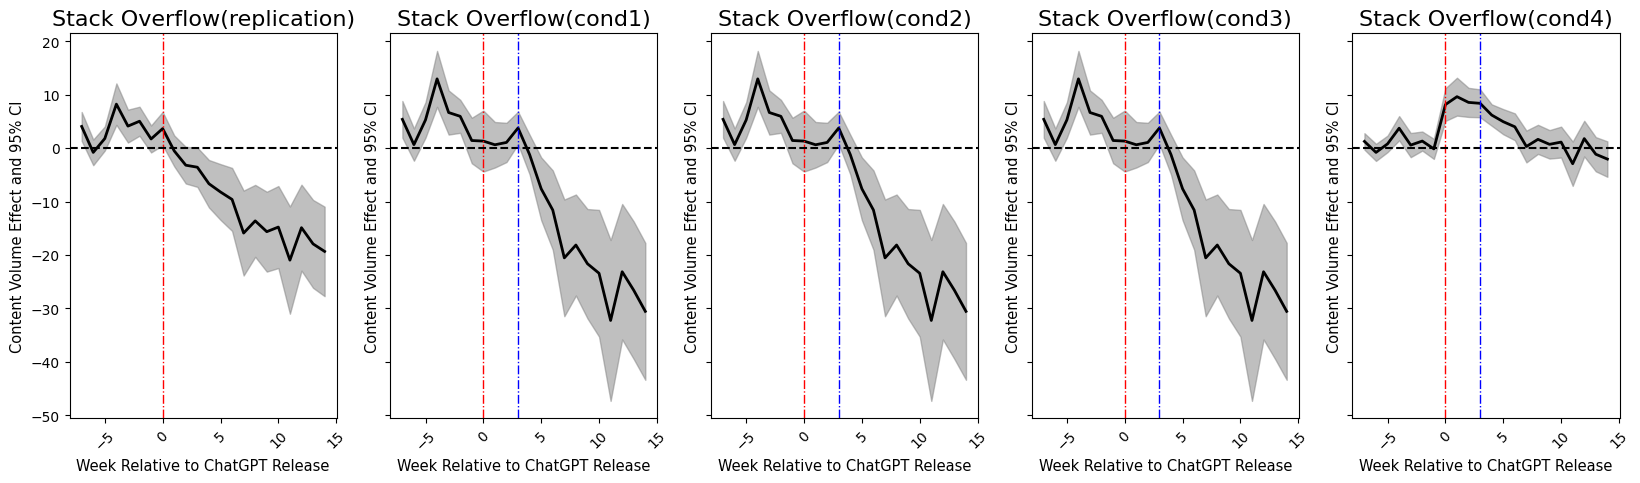

In [89]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 5, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(replication)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)


axs[1].fill_between(cond1_df_coefs['period'], cond1_df_coefs['ll_95'], cond1_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond1_df_coefs['period'], cond1_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond1)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond2_df_coefs['period'], cond2_df_coefs['ll_95'], cond2_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond2_df_coefs['period'], cond2_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond2)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond3)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)


axs[4].fill_between(postcnt_per_tag_df_coefs['period'], postcnt_per_tag_df_coefs['ll_95'], postcnt_per_tag_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[4].plot(postcnt_per_tag_df_coefs['period'], postcnt_per_tag_df_coefs['Estimate'], color='black', linewidth=2)
axs[4].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[4].axhline(y=0, color='black', linestyle='--')
axs[4].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[4].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[4].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[4].set_title("Stack Overflow(cond4)", fontsize=16)
axs[4].tick_params(axis='x', rotation=45)
axs[4].grid(False)


plt.show();

In [72]:
result_dyn

Dep. Variable:,q_count,R-squared:,0.0563
Estimator:,PanelOLS,R-squared (Between):,1.11e-16
No. Observations:,15778,R-squared (Within):,0.0563
Date:,"Wed, Oct 02 2024",R-squared (Overall):,0.0054
Time:,22:38:46,Log-likelihood,-7.736e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,20.783
Entities:,49,P-value,0.0000
Avg Obs:,322.00,Distribution:,"F(45,15684)"
Min Obs:,322.00,,
Max Obs:,322.00,F-statistic (robust):,1.005e+08


In [73]:
cond3_result_dyn

Dep. Variable:,sede_q_count,R-squared:,0.0985
Estimator:,PanelOLS,R-squared (Between):,-2.22e-16
No. Observations:,15778,R-squared (Within):,0.0985
Date:,"Wed, Oct 02 2024",R-squared (Overall):,0.0090
Time:,22:38:49,Log-likelihood,-8.42e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,38.088
Entities:,49,P-value,0.0000
Avg Obs:,322.00,Distribution:,"F(45,15684)"
Min Obs:,322.00,,
Max Obs:,322.00,F-statistic (robust):,2.921e+07


In [74]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_yn)
cond3_result_dyn = cond3_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [75]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_y)
cond3_y_result_dyn = cond3_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [76]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_n)
cond3_n_result_dyn = cond3_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [77]:
# 동적 효과 계수 추출
cond3_y_coefs       = cond3_y_result_dyn.params
cond3_y_std_errors  = cond3_y_result_dyn.std_errors
cond3_y_conf_int    = cond3_y_result_dyn.conf_int()

In [78]:
# 동적 효과 계수 추출
cond3_n_coefs       = cond3_n_result_dyn.params
cond3_n_std_errors  = cond3_n_result_dyn.std_errors
cond3_n_conf_int    = cond3_n_result_dyn.conf_int()

In [79]:
# 동적 효과 계수 추출
cond3_coefs = cond3_result_dyn.params
cond3_std_errors = cond3_result_dyn.std_errors
cond3_conf_int = cond3_result_dyn.conf_int()

In [80]:
cond3_coefs_filtered      = cond3_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_std_errors_filtered = cond3_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [81]:
cond3_y_coefs_filtered      = cond3_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_y_std_errors_filtered = cond3_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [82]:
cond3_n_coefs_filtered      = cond3_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_n_std_errors_filtered = cond3_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [83]:
# 신뢰구간 계산
cond3_ll_95 = cond3_coefs_filtered - 1.965 * cond3_std_errors_filtered
cond3_ul_95 = cond3_coefs_filtered + 1.965 * cond3_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_coefs_filtered,
    'll_95'     : cond3_ll_95,
    'ul_95'     : cond3_ul_95
})

In [84]:
# 신뢰구간 계산
cond3_y_ll_95 = cond3_y_coefs_filtered - 1.965 * cond3_y_std_errors_filtered
cond3_y_ul_95 = cond3_y_coefs_filtered + 1.965 * cond3_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_y_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_y_coefs_filtered,
    'll_95'     : cond3_y_ll_95,
    'ul_95'     : cond3_y_ul_95
})

In [85]:
# 신뢰구간 계산
cond3_n_ll_95 = cond3_n_coefs_filtered - 1.965 * cond3_n_std_errors_filtered
cond3_n_ul_95 = cond3_n_coefs_filtered + 1.965 * cond3_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_n_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_n_coefs_filtered,
    'll_95'     : cond3_n_ll_95,
    'ul_95'     : cond3_n_ul_95
})

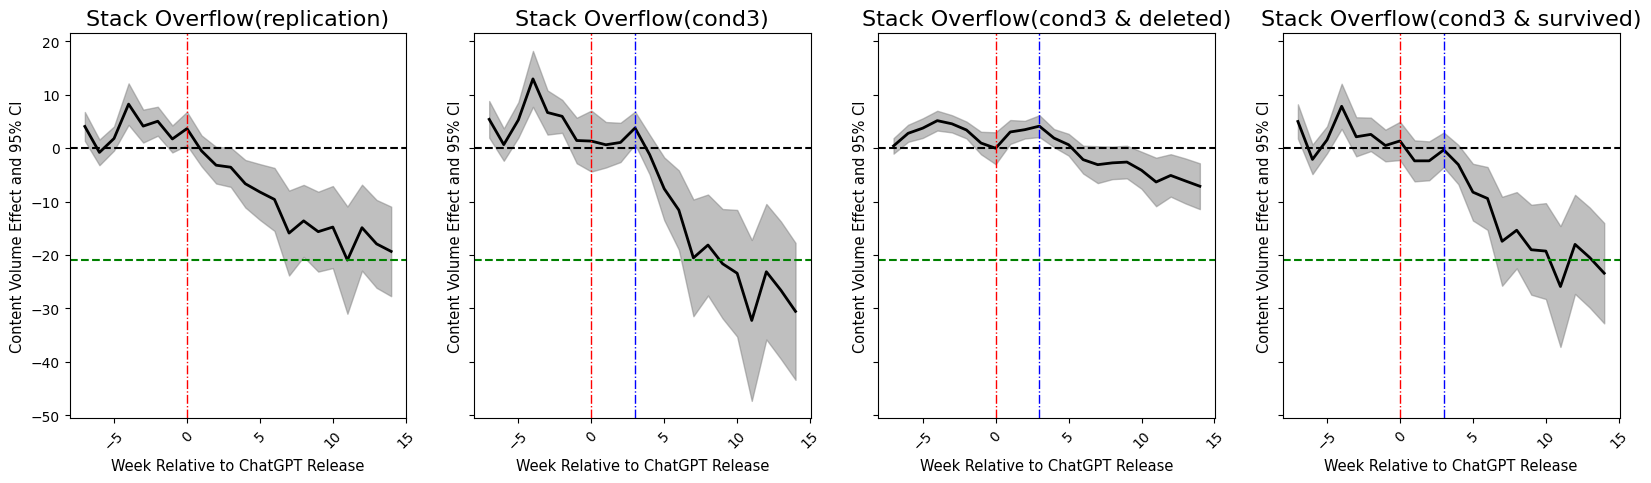

In [86]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(replication)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3 & deleted)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


axs[3].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond3 & survived)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();

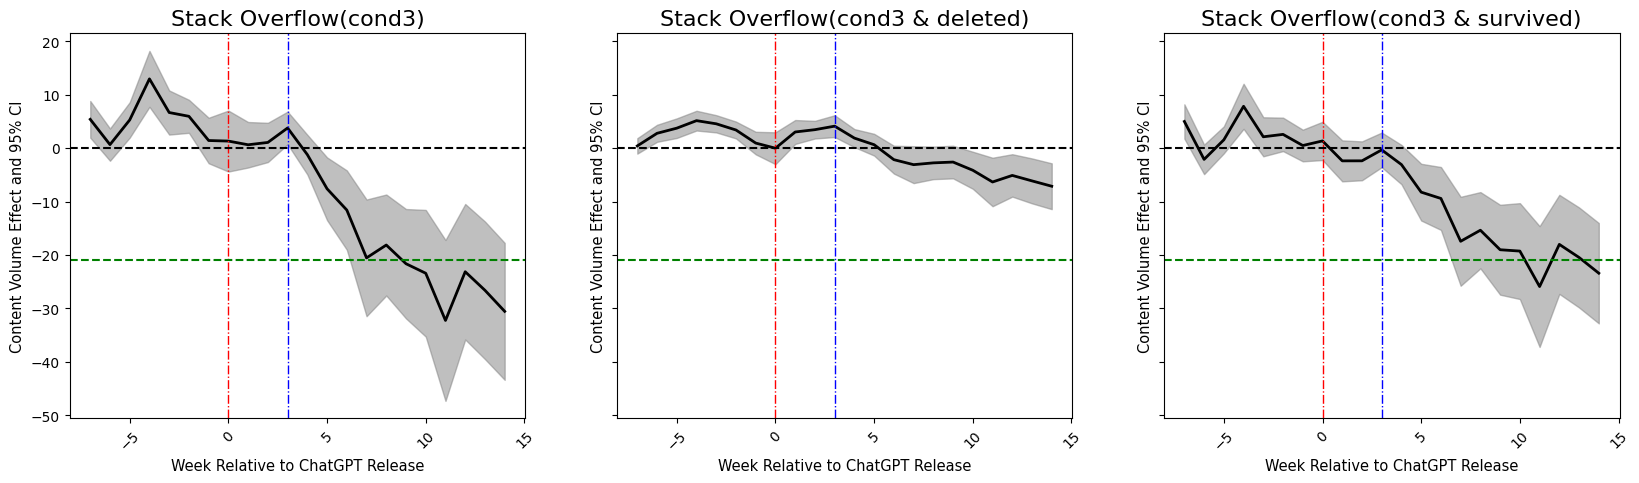

In [87]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 3, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(cond3)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3 & deleted)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3 & survived)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)



plt.show();